In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Breast_cancer.csv')

In [3]:
print(df.head())
print(df.info())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [4]:
# Preprocess dataset
# Drop ID column if exists
if 'id' in df.columns:
    df.drop(columns=['id'], inplace=True)

# Convert diagnosis to binary: M = 1 (malignant), B = 0 (benign)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
# Separate features and labels
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [5]:
#Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') # Create an imputer instance
X_scaled = imputer.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)


In [7]:
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print("Accuracy with Linear Kernel:", accuracy_linear)

Accuracy with Linear Kernel: 0.9649122807017544


In [8]:
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print("Accuracy with RBF Kernel:", accuracy_rbf)

Accuracy with RBF Kernel: 0.9532163742690059


In [9]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5, verbose=0)
grid.fit(X_train, y_train)

print("Best Parameters from Grid Search:", grid.best_params_)

Best Parameters from Grid Search: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [10]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Cross-validation
cv_scores = cross_val_score(best_model, X_scaled, y, cv=5)
print("Cross-validation accuracy scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       108
           1       0.98      0.89      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

Confusion Matrix:
 [[107   1]
 [  7  56]]
Cross-validation accuracy scores: [0.87719298 0.92105263 0.9122807  0.95614035 0.94690265]
Mean CV accuracy: 0.9227138643067846


In [11]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

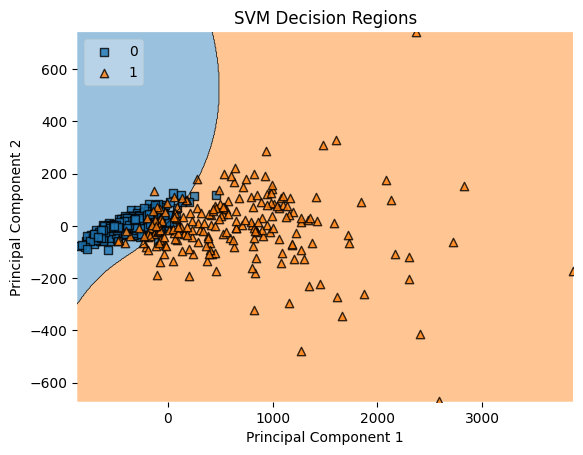

In [12]:
plot_decision_regions(X_pca, y.values, clf=best_model, legend=2)

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Regions')
plt.show()

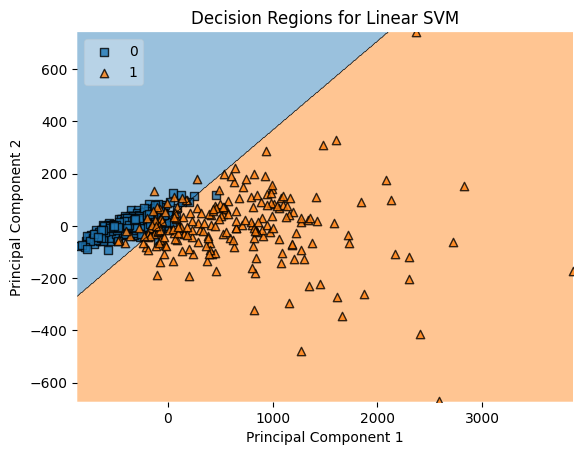

In [13]:
# Decision plot for Linear SVM
plot_decision_regions(X_pca, y.values, clf=svm_linear, legend=2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Regions for Linear SVM')
plt.show()

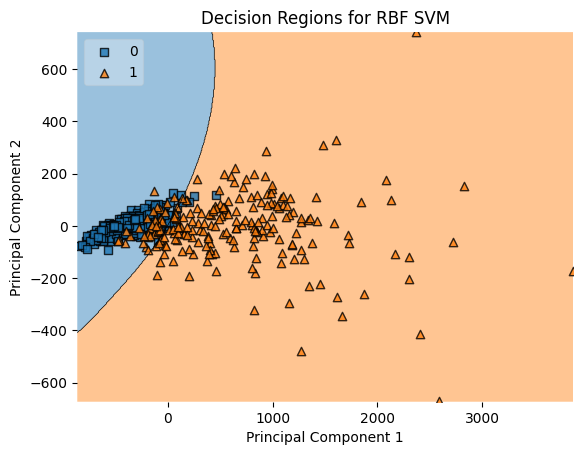

In [14]:
# Decision plot for RBF SVM
plot_decision_regions(X_pca, y.values, clf=svm_rbf, legend=2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Regions for RBF SVM')
plt.show()